In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import statistics
import plotly.express as px
import researchpy as rp
import pylab
import statsmodels.api as sm
import math
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy.stats import kstest
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportion_confint
from IPython.display import Markdown, display
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score, confusion_matrix, roc_auc_score, classification_report, log_loss
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
matches = pd.read_csv("matches.csv", index_col=0)

In [36]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [37]:
matches.shape

(1389, 27)

In [38]:
# 2 sezone * 20 timova * 38 utakmica

2 * 20 * 38

1520

In [39]:
matches["team"].value_counts()

#Timovi koji nisu ispadali iz lige / ulazili u ligu trebaju imati 76, a ostali po 38 utakmica

Southampton                 72
Brighton and Hove Albion    72
Manchester United           72
West Ham United             72
Newcastle United            72
Burnley                     71
Leeds United                71
Crystal Palace              71
Manchester City             71
Wolverhampton Wanderers     71
Tottenham Hotspur           71
Arsenal                     71
Leicester City              70
Chelsea                     70
Aston Villa                 70
Everton                     70
Liverpool                   38
Fulham                      38
West Bromwich Albion        38
Sheffield United            38
Brentford                   34
Watford                     33
Norwich City                33
Name: team, dtype: int64

In [40]:
matches["round"].value_counts()

#Trebao bi biti 40 za svaki matchweek

Matchweek 1     39
Matchweek 16    39
Matchweek 34    39
Matchweek 32    39
Matchweek 31    39
Matchweek 29    39
Matchweek 28    39
Matchweek 26    39
Matchweek 25    39
Matchweek 24    39
Matchweek 23    39
Matchweek 2     39
Matchweek 19    39
Matchweek 17    39
Matchweek 20    39
Matchweek 15    39
Matchweek 5     39
Matchweek 3     39
Matchweek 13    39
Matchweek 12    39
Matchweek 4     39
Matchweek 11    39
Matchweek 10    39
Matchweek 9     39
Matchweek 8     39
Matchweek 14    39
Matchweek 7     39
Matchweek 6     39
Matchweek 30    37
Matchweek 27    37
Matchweek 22    37
Matchweek 21    37
Matchweek 18    37
Matchweek 33    32
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: round, dtype: int64

In [41]:
matches.dtypes

#Provjera tipa podataka

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

In [42]:
del matches["comp"]

In [43]:
del matches["notes"]

In [44]:
matches["date"] = pd.to_datetime(matches["date"])

#Konverzija date iz object u datetime

In [45]:
matches["target"] = (matches["result"] == "W").astype("int")

#W = 1, D/L = 0

In [46]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,match report,sh,sot,dist,fk,pk,pkatt,season,team,target
1,2021-08-15,16:30,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,...,Match Report,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,0
2,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,...,Match Report,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,1
3,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,...,Match Report,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,1
4,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,...,Match Report,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,1
6,2021-09-18,15:00,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,...,Match Report,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,0.5,...,Match Report,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United,0
39,2021-05-08,15:00,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,0.7,...,Match Report,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United,0
40,2021-05-16,19:00,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,1.6,...,Match Report,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,1
41,2021-05-19,18:00,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,0.8,...,Match Report,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United,0


In [47]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes

#Nova kolona venue_code koja je zapravo konverzija objekta venue u int vrijednost (Home = 1, Away = 0)

In [48]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

#Nova kolona opp_code koja svaki tim predstavlja int vrijednoscu (Arsenal = 0, Aston Villa = 1...)

In [49]:
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")

#Nova kolona hour koja pretvara vrijeme u int vrijednost (16:30 = 16, 15:45 = 15...)

In [50]:
matches["day_code"] = matches["date"].dt.dayofweek

#Nova kolona day_code koja pretvara dan u int vrijednost (Monday = 0, Tuesday = 1...)

In [51]:
matches["captain_code"] = matches["captain"].astype("category").cat.codes

#Nova kolona captain_code koja pretvara captain-a u int

In [52]:
matches["referee_code"] = matches["referee"].astype("category").cat.codes

#Nova kolona referee_code koja pretvara referee-a u int

In [53]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,pkatt,season,team,target,venue_code,opp_code,hour,day_code,captain_code,referee_code
1,2021-08-15,16:30,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,...,0.0,2022,Manchester City,0,0,18,16,6,24,2
2,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,...,0.0,2022,Manchester City,1,1,15,15,5,90,7
3,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,...,0.0,2022,Manchester City,1,1,0,12,5,90,13
4,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,...,0.0,2022,Manchester City,1,0,10,15,5,90,17
6,2021-09-18,15:00,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,...,0.0,2022,Manchester City,0,1,17,15,5,24,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,0.5,...,0.0,2021,Sheffield United,0,0,18,19,6,43,0
39,2021-05-08,15:00,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,0.7,...,0.0,2021,Sheffield United,0,1,6,15,5,43,20
40,2021-05-16,19:00,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,1.6,...,0.0,2021,Sheffield United,1,0,7,19,6,43,10
41,2021-05-19,18:00,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,0.8,...,0.0,2021,Sheffield United,0,0,14,18,2,43,19


In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

# n_estimators = broj zasebnih stabla odluke koje zelimo trenirati
# min_samples_split = broj primjera koje zelimo imati na svakom listu drveta prije donosenja odluke

In [56]:
train = matches[matches["date"] < '2022-01-01']

# data za training je sve prije 01.01.2022.

In [57]:
test = matches[matches["date"] > '2022-01-01']

# data za testing je sve poslije 01.01.2022.

In [58]:
predictors = ["venue_code", "opp_code", "hour", "day_code", "captain_code", "referee_code"]

# ovdje dodaj jos predictora

In [59]:
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [60]:
preds = rf.predict(test[predictors])

# predvidjanja

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
error = accuracy_score(test["target"], preds)

# test preciznosti, porede se predvidjanja sa stvarnim rezultatima

In [63]:
error

0.6231884057971014

In [64]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))

# kombinacija stvarnih i predvidjenih vrijednosti

In [65]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

# sta smo predvidjeli tacno, a sta ne?

predicted,0,1
actual,,
0,146,26
1,78,26


In [66]:
from sklearn.metrics import precision_score

precision_score(test["target"], preds)

0.5

In [67]:
classifiers = [
#     KNeighborsClassifier(2),
#     KNeighborsClassifier(3),
#     KNeighborsClassifier(4),
#     KNeighborsClassifier(5), ne valjaju ovi nikako
#     LogisticRegression(), svi su 61%, nema razlike
#     SVC(kernel="linear", C=0.025, probability=True),
#     SVC(kernel="linear", C=0.05, probability=True),
#     SVC(kernel="linear", C=0.075, probability=True),
#     SVC(gamma=2, C=1, probability=True),
#     SVC(gamma=1, C=1, probability=True),
#     SVC(gamma=2, C=2, probability=True),
#     SVC(gamma=1, C=2, probability=True),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     GaussianProcessClassifier(1.0 * RBF(1.1)),
#     GaussianProcessClassifier(1.0 * RBF(1.2)),
#     DecisionTreeClassifier(max_depth=4),
#     DecisionTreeClassifier(max_depth=5),
#     DecisionTreeClassifier(max_depth=6),
#     DecisionTreeClassifier(max_depth=8),
    ## n_estimators = 43 najbolji rez
    ## min_samples_split = 11 najbolji rez
    
#     AdaBoostClassifier(learning_rate=1.544, n_estimators=52, random_state=42) -> 0.6894736842105263
    
#     AdaBoostClassifier(learning_rate=1.53, n_estimators=45, random_state=42) -> 0.6881578947368421

#     AdaBoostClassifier(learning_rate=1.55, n_estimators=52, random_state=42) -> 0.6855263157894737
    
#     AdaBoostClassifier(learning_rate=1.5, n_estimators=46, random_state=42) -> 0.6789473684210526
    
#     RandomForestClassifier(n_estimators=53, min_samples_split=11, random_state=42, max_depth=9) -> 0.6710526315789473
    
#     min_samples_split=14, random_state=42, max_depth=13)
#     min_samples_split=14, random_state=42, max_depth=14)    
    
#     AdaBoostClassifier(learning_rate=1.3164, n_estimators=61, random_state=42) -> 0.7072538860103627
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']

#     AdaBoostClassifier(learning_rate=1.3624, n_estimators=45, random_state=42) -> 0.7046632124352331
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']
    
#     AdaBoostClassifier(learning_rate=1.364, n_estimators=45, random_state=42) -> 0.7020725388601037
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']
      
    RandomForestClassifier(n_estimators=45, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=46, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=47, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=48, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=49, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=51, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=52, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=53, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=54, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=55, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=56, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=57, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=58, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=59, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=60, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=61, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=62, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=63, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=64, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=65, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=66, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=67, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=68, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=69, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=70, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=71, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=72, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=73, min_samples_split=10, random_state=42),
    RandomForestClassifier(n_estimators=74, min_samples_split=10, random_state=42)    
    
#     RandomForestClassifier(max_depth=10, n_estimators=15, max_features=1),
#     RandomForestClassifier(max_depth=12, n_estimators=20, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     MLPClassifier(alpha=1, max_iter=1100),
#     MLPClassifier(alpha=1, max_iter=1200),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis()
]

In [74]:
precisions = []

In [75]:
estimators = []

In [76]:
accuracies = []

In [77]:
for clf in classifiers:
#         clf.fit(X_train, y_train)
        clf.fit(train[predictors], train["target"])
#         accuracy = clf.score(X_test, y_test)
        accuracy = accuracy_score(test["target"], clf.predict(test[predictors])) 
        precision = precision_score(test["target"], clf.predict(test[predictors]))
#         mae = mean_absolute_error(test["target"], clf.predict(test[predictors]))
#         mse = mean_squared_error(test["target"], clf.predict(test[predictors]))
#         rmse = mean_squared_error(test["target"], clf.predict(test[predictors]), squared=False)

#         prediction_proba = clf.predict_proba(X_test)
#         logloss = log_loss(y_test,prediction_proba)
#         precision = score(y_test, prediction_proba)
#         conf_martrix = confusion_matrix(y_test, prediction_proba)
#         clas_report = classification_report(y_test, prediction_proba)
        estimators.append(clf.n_estimators)
        precisions.append(precision)
        accuracies.append(accuracy)
        print(clf.n_estimators, precision, accuracy)
#         print("MAE:", mae)
#         print("MSE:", mse)
#         print("RMSE:", rmse)
#         print("")

45 0.46511627906976744 0.6123188405797102
46 0.46511627906976744 0.6123188405797102
47 0.4782608695652174 0.6159420289855072
48 0.46511627906976744 0.6123188405797102
49 0.44680851063829785 0.605072463768116
50 0.45652173913043476 0.6086956521739131
51 0.45652173913043476 0.6086956521739131
52 0.45652173913043476 0.6086956521739131
53 0.45454545454545453 0.6086956521739131
54 0.46511627906976744 0.6123188405797102
55 0.4523809523809524 0.6086956521739131
56 0.5128205128205128 0.6268115942028986
57 0.4883720930232558 0.6195652173913043
58 0.45454545454545453 0.6086956521739131
59 0.4666666666666667 0.6123188405797102
60 0.5 0.6231884057971014
61 0.4883720930232558 0.6195652173913043
62 0.4888888888888889 0.6195652173913043
63 0.4888888888888889 0.6195652173913043
64 0.4888888888888889 0.6195652173913043
65 0.5 0.6231884057971014
66 0.4888888888888889 0.6195652173913043
67 0.5 0.6231884057971014
68 0.4791666666666667 0.6159420289855072
69 0.4897959183673469 0.6195652173913043
70 0.5 0.62

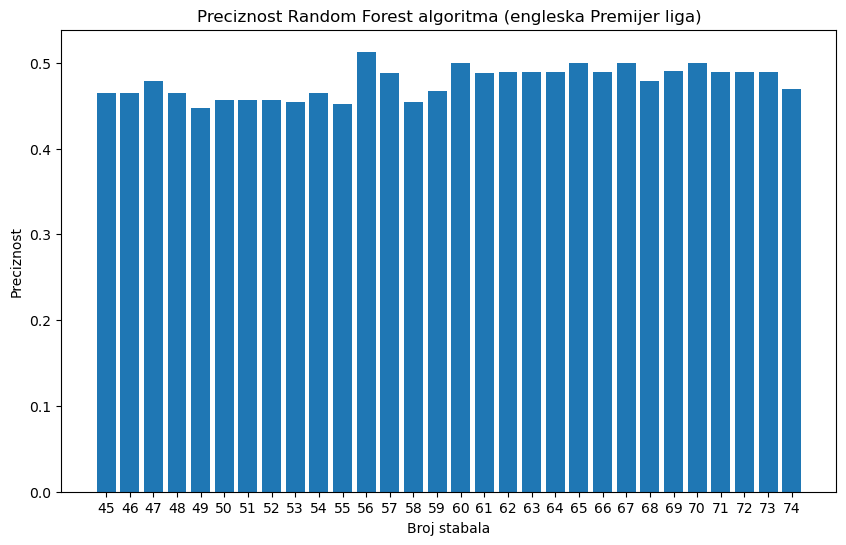

In [72]:
plt.figure(figsize=(10,6))
plt.bar(range(len(precisions)), precisions, tick_label=estimators)
plt.title("Preciznost Random Forest algoritma (engleska Premijer liga)")
plt.xlabel("Broj stabala")
plt.ylabel("Preciznost")
plt.xticks()
plt.savefig("preciznost_rfa_prem1.png")
plt.show()

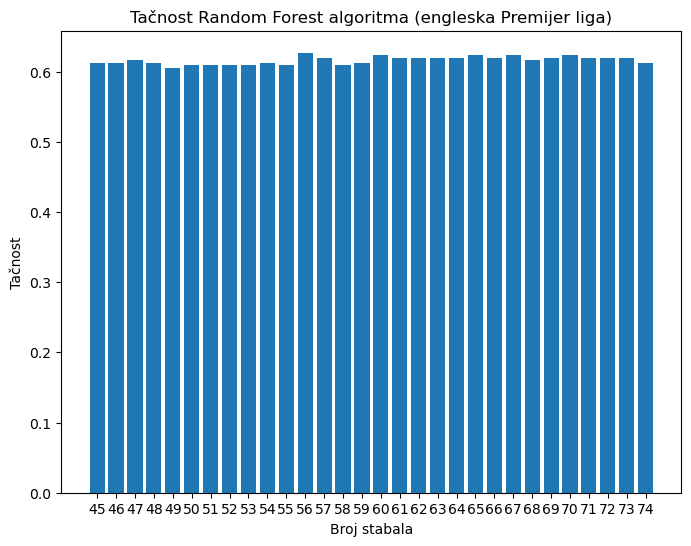

In [73]:
# # Visualize Accuracy
plt.figure(figsize=(8,6))
plt.bar(range(len(accuracies)), accuracies, tick_label=estimators)
plt.title("Tačnost Random Forest algoritma (engleska Premijer liga)")
plt.xlabel("Broj stabala")
plt.ylabel("Tačnost")
plt.xticks()
plt.yticks()
plt.savefig("tacnost_rfa_prem1.png")
plt.show()

In [76]:
grouped_matches = matches.groupby("team")

# grupisi utakmice po timu

In [77]:
group = grouped_matches.get_group("Manchester City").sort_values("date")

In [78]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date") # sortiraj po datumu
    rolling_stats = group[cols].rolling(3, closed='left').mean() # uzima mean rezultata od prethodna 3 matchweek-a
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols) # uklanja nedostajuce vrijednosti
    return group

In [79]:
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

# rolling averages uzima prosjecne vrijednosti ovih kolona u protekla 3 matchweek-a i na taj nacin predvidja ishod sljedeceg meca

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,captain_code,referee_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
5,2020-10-17,17:30,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,1.5,...,75,3,2.000000,2.333333,17.333333,4.666667,18.900000,1.333333,0.333333,0.333333
7,2020-10-24,12:30,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham United,1.1,...,75,2,1.333333,2.000000,17.333333,3.666667,17.733333,0.666667,0.000000,0.000000
9,2020-10-31,12:30,Matchweek 7,Sat,Away,W,1.0,0.0,Sheffield Utd,1.5,...,53,14,1.000000,0.666667,16.666667,4.333333,18.233333,0.666667,0.000000,0.000000
11,2020-11-08,16:30,Matchweek 8,Sun,Home,D,1.0,1.0,Liverpool,1.6,...,53,4,1.000000,0.333333,14.333333,6.666667,18.466667,1.000000,0.000000,0.000000
12,2020-11-21,17:30,Matchweek 9,Sat,Away,L,0.0,2.0,Tottenham Hotspur,1.3,...,53,16,1.000000,0.666667,12.000000,5.666667,19.366667,1.000000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2022-04-02,15:00,Matchweek 31,Sat,Away,W,2.0,0.0,Burnley,1.8,...,93,4,1.666667,0.333333,18.333333,7.333333,16.000000,0.333333,0.000000,0.000000
46,2022-04-10,16:30,Matchweek 32,Sun,Home,D,2.0,2.0,Liverpool,2.0,...,53,2,2.000000,0.333333,20.000000,6.666667,16.133333,0.333333,0.000000,0.000000
49,2022-04-20,20:00,Matchweek 30,Wed,Home,W,3.0,0.0,Brighton,1.2,...,93,16,1.333333,0.666667,15.666667,4.666667,16.700000,0.333333,0.000000,0.000000
50,2022-04-23,15:00,Matchweek 34,Sat,Home,W,5.0,1.0,Watford,3.0,...,25,11,2.333333,0.666667,15.333333,5.000000,17.200000,0.333333,0.000000,0.000000


In [80]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [81]:
matches_rolling.shape

(1337, 40)

In [82]:
matches_rolling = matches_rolling.droplevel('team')

In [83]:
matches_rolling

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,captain_code,referee_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,14:00,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,0.4,...,73,12,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,0.9,...,73,3,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,0.9,...,73,4,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,1.1,...,73,16,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,1.5,...,73,13,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,2022-03-18,20:00,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,0.8,...,15,11,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
34,2022-04-02,15:00,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,1.2,...,15,5,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
35,2022-04-08,20:00,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,0.3,...,15,18,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000
36,2022-04-24,14:00,Matchweek 34,Sun,Away,L,0.0,1.0,Burnley,0.7,...,15,2,1.333333,1.666667,10.000000,4.666667,17.633333,0.000000,0.000000,0.000000


In [84]:
matches_rolling.index = range(matches_rolling.shape[0])

# indeksiraj redom a ne po timu

In [85]:
def make_predictions(data, predictors):
    train = data[data["date"] < '2022-01-01'] # podjela podataka
    test = data[data["date"] > '2022-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    error = precision_score(test["target"], preds)
    return combined, error

In [86]:
combined, error = make_predictions(matches_rolling, predictors + new_cols)

In [87]:
error

0.6458333333333334

In [88]:
combined

,actual,predicted
55,0,0
56,1,1
57,1,0
58,1,1
59,1,1
...,...,...
1332,0,0
1333,1,0
1334,0,0
1335,0,0


In [89]:
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

In [90]:
combined

,actual,predicted,date,team,opponent,result
55,0,0,2022-01-23,Arsenal,Burnley,D
56,1,1,2022-02-10,Arsenal,Wolverhampton Wanderers,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolverhampton Wanderers,W
59,1,1,2022-03-06,Arsenal,Watford,W
...,...,...,...,...,...,...
1332,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L
1333,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W
1334,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L
1335,0,0,2022-04-24,Wolverhampton Wanderers,Burnley,L


In [91]:
# class MissingDict(dict):
 #  __missing__ = lambda self, key: key
#
#map_values = {"Brighton and Hove Albion": "Brighton", "Manchester United": "Manchester Utd", "Newcastle United": "Newcastle Utd", "Tottenham Hotspur": "Tottenham", "West Ham United": "West Ham", "Wolverhampton Wanderers": "Wolves"} 
#mapping = MissingDict(**map_values)

In [92]:
#combined["new_team"] = combined["team"].map(mapping)

In [93]:
#merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])

In [94]:
#merged

In [241]:
#merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] ==0)]["actual_x"].value_counts()